In [2]:
# Importing necessary modules
import pandas as pd

# Importing auxiliary classes
from python_scripts.data_transformation import DataAnalysis
from python_scripts.data_transformation import DataCleaning
from python_scripts.data_visualisation import DataVisualisation

In [3]:
# Creating an instance of each class
processing = DataCleaning()
analysis = DataAnalysis()
visual = DataVisualisation()

In [4]:
# Loading scraped data
df = pd.read_csv('data/BA_reviews.csv', index_col=0)
df

,reviews
0,Not Verified | Horrendous experience. High co...
1,✅ Trip Verified | Absolutely pathetic business...
2,Not Verified | Overall not bad. Staff look ti...
3,✅ Trip Verified | This was our first flight wi...
4,✅ Trip Verified | I recently encountered a hig...
...,...
2995,Travelled with my wife from Barbados to London...
2996,LGW-AGP Club Europe. Ground staff were very ch...
2997,BA seem to be trying harder ground customer se...
2998,Madrid-London City return. Excellent experienc...


## Data Cleaning

Now we have loaded the data, by looking at it, it can be identified that the first step is to drop the duplicate rows (reviews).

In [5]:
df = df.drop_duplicates()

Next we can double check there are no null values.

In [6]:
df.isna().sum()

reviews    0
dtype: int64

There are no null values so now we will remove any unnecessary strings or characters from the dataframe which can be seen by exploring the dataframe.

In [7]:
# Input all unnecesary characters and strings into a list.
to_replace = ['Trip Verified | ', '✅', 'Not Verified ', 'verified review', '|', 'Unverified | ', r'\b(\w{1,3})\b', '!"#$%&', "'()*+, -./:;<=>?@[\]^_`{|}~"]

df = processing.replace_characters(df, 'reviews', characters=to_replace)

<>:2: DeprecationWarning: invalid escape sequence \]
<>:2: DeprecationWarning: invalid escape sequence \]
C:\Users\joels\AppData\Local\Temp\ipykernel_11820\1549622474.py:2: DeprecationWarning: invalid escape sequence \]
  to_replace = ['Trip Verified | ', '✅', 'Not Verified ', 'verified review', '|', 'Unverified | ', r'\b(\w{1,3})\b', '!"#$%&', "'()*+, -./:;<=>?@[\]^_`{|}~"]


Now we need to make the dataframe lower case.

In [8]:
df.loc[:, 'reviews'] = df['reviews'].str.lower()

## Exploratory Data Analysis

Now the data has been cleaned to get a better understanding of the reviews we can utilise a word cloud to identify the most common words that appear in the reviews.

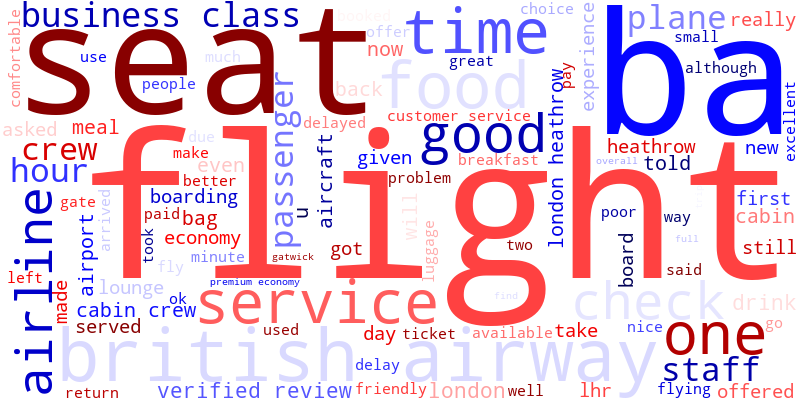

In [9]:
visual.word_cloud(df, 'reviews')

It can be seen that the most common words appear to be related to the airline experience such as 'flight', 'seat' and 'service' which are to be expected from customer reviews.

## Data Analysis

### Topic Modelling
Now we can do some data analysis on this data. The first analysis will be a topic model using Latent Dirichlet Allocation (LDA). This will use a generative model to extract topics from a textual corpora such as our dataframe of reviews. The first step is to generate the model. This will be done by pre-processingt the data for the model by tokenising the data, then finding bi-gram and tri-gram phrases which can also be encorporated, followed by removing low-value common phrases. Finally the LDA model can be generated.

In [29]:
data_words = analysis.tokenise_data(df, 'reviews') # Tokenising data into list of lowercase words for each row.
bigram_trigram = analysis.bigram_trigram(data_words) # Return trigram transformed data.
variables = analysis.tf_idf_removal(bigram_trigram, low_value = 0.01) # Generating a dictionary mapping word IDs to words 
# and a modified bag-of-words representation with low TF-IDF score words filtered out.
id2word = variables[0] # First value in variables tuple.
corpus = variables[1] # Second value in variables tuple.
# Generate LDA Model:
lda_model = analysis.lda_model(id2word, corpus, num_topics = 20, alpha = 'auto', chunksize = 100, passes = 15)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joels\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Now the model has been generated, a LDA visual can be used to demonstrate the topic clustering.

In [36]:
visual.lda_visual(lda_model, corpus, id2word, mds="mmds", R=30)

c:\Users\joels\Miniconda3\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.483287 -0.181254       1        1  42.432795
10    -0.510427  0.043994       2        1  26.551179
0     -0.309164 -0.419426       3        1  20.175002
4      0.096392 -0.439117       4        1   2.718436
2      0.087880  0.377663       5        1   0.991907
8     -0.117488  0.315521       6        1   0.898114
5     -0.223074  0.184663       7        1   0.890555
18    -0.111281 -0.160467       8        1   0.795233
19     0.117069 -0.223131       9        1   0.708352
6      0.339716 -0.054478      10        1   0.605849
16     0.232948 -0.137543      11        1   0.477933
11     0.258741  0.174876      12        1   0.449634
1     -0.037546 -0.024495      13        1   0.402078
3     -0.042989  0.080692      14        1   0.391235
15     0.019075  0.176385      15        1   0.353740
13     0.129474  0.178103      16        1   0.297342
12     0.090740 -0.036901      17        1   0.243380
17     0.177816  0.011305      18        1   0.237014
9      0.192727  0.080211      19        1   0.230398
14     0.092679  0.053401      20        1   0.149823, topic_info=                 Term         Freq        Total Category  logprob  loglift
55               seat  2585.000000  2585.000000  Default  30.0000  30.0000
172             seats  2421.000000  2421.000000  Default  29.0000  29.0000
23             flight  6085.000000  6085.000000  Default  28.0000  28.0000
124              food  2386.000000  2386.000000  Default  27.0000  27.0000
289             cabin  2260.000000  2260.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
2810            worth     0.021504     0.888969  Topic20  -9.7145   2.7816
2552           boeing     0.021504     0.889052  Topic20  -9.7145   2.7816
2712        long_haul     0.021504     0.889031  Topic20  -9.7145   2.7816
8793  verified_review     0.021504     0.889079  Topic20  -9.7145   2.7815
3144         leg_room     0.021504     0.889009  Topic20  -9.7145   2.7816

[827 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1699      8  0.980812      accept
75        4  0.989311      across
1968      5  0.963757     address
754       7  0.978124  advertised
2067      8  0.977405      advice
...     ...       ...         ...
568      13  0.959440        wrap
2254     15  0.932288     written
443       4  0.996531        year
2293     10  0.984718   years_ago
1105      6  0.964052      zurich

[618 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 11, 1, 5, 3, 9, 6, 19, 20, 7, 17, 12, 2, 4, 16, 14, 13, 18, 10, 15])

The model and visual parameters were tweaked to get the most even clustering and relevant topics. The topics seem to be relatively evenly clustered and most of the topics appear to consist of relevant key words with some overlap for example words like 'seats' (topics 1 and 3) and 'staff' (topics 1, 2 and 3) among a few others. The topics identified by the model clustering are as follows:

- Topic 1: Airline In-Flight Experience
- Topic 2: Customer Service and Delays
- Topic 3: Seat Options and Preferences
- Topic 4: Customer Experiences and Customer Feedback
- Topic 5: Airline Passenger Complaints and Cabin Conditions
- Topic 6: Airline Loyalty Programs and Passenger Experience
- Topic 7: Service Standards and Budget Carrier Experiences
- Topic 8: Premium Economy Experience and Service Issues
- Topic 9: Service Quality and Passenger Concerns
- Topic 10: Cabin Comfort and Passenger Complaints
- Topic 11: Passenger Cabin Comfort
- Topic 12: In-Flight Services
- Topic 13: Boarding Experience and Onboard Services
- Topic 14: Budget Airline Fees and Passenger Comfort
- Topic 15: Customer Service and Lost Luggage Experiences
- Topic 16: Long-Haul Flight Experience and In-Flight Service
- Topic 17: Service Quality
- Topic 18: In-Flight Quality
- Topic 19: Passenger Requests and Amenities
- Topic 20: Cabin Amenities and Passenger Comfort

This analysis gives a clearer picture of the parts of the customers experience with the airline that is more prevelant and important. The in-flight experience, delays and seat options seem to be reocurring themes in these reviews. However from identifying the topics it can be stated that there is repetition and overlap of certain themes among topics and certain topics contain multiple themes so further topic modelling should refine the topic clustering and model.

### Sentiment Analysis

To further understand the customer experience it would be useful to understand the tone of the reviews, so the next analysis will be a sentiment analysis. This will identify whether the reviews have a 'positive', 'negative' or 'neutral' sentiment. To start with the Valence Aware Dictionary and sEntiment Reasoner (VADER) sentiment intensity analysing model will be generated, this will add a negative, neutral and positive score for each review to the data frame as well as a compound score that aggregates all the scores and indicates the overall sentiment or tone of the review.

In [12]:
sentiment_df = analysis.vader_sentiment_analysis(df, 'reviews')
sentiment_df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\joels\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,negative score,neutral score,positive score,compound score
0,horrendous experience. high cost of seat res...,0.114,0.849,0.037,-0.9572
1,absolutely pathetic business class product. b...,0.067,0.805,0.129,0.9775
2,overall not bad. staff look tired and overwo...,0.047,0.841,0.113,0.9644
3,this was our first flight with british airway...,0.071,0.697,0.231,0.9690
4,i recently encountered a highly disappointing...,0.140,0.767,0.093,-0.8855
...,...,...,...,...,...
2995,travelled with my wife from barbados to london...,0.000,0.846,0.154,0.8955
2996,lgw-agp club europe. ground staff were very ch...,0.045,0.742,0.213,0.9529
2997,ba seem to be trying harder ground customer se...,0.039,0.739,0.222,0.9901
2998,madrid-london city return. excellent experienc...,0.055,0.648,0.297,0.9798


Now that the sentiment scores have been added to the dataframe, we can visualise the sentiment data. First we can look at how the negative, neutral and positive scores are distributed among views independantly.

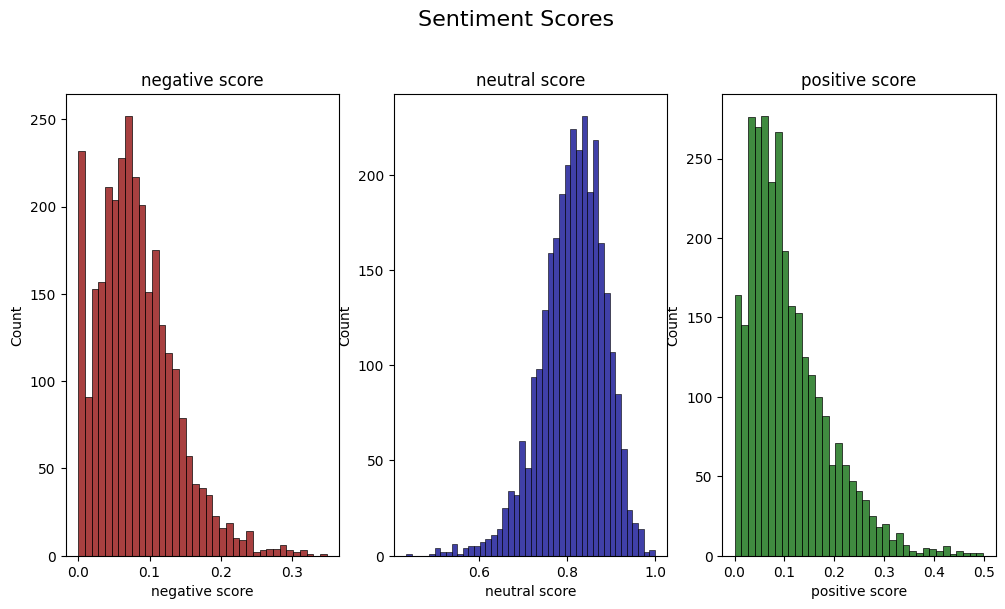

In [13]:
visual.sentiment_scores(sentiment_df, ['negative score', 'neutral score', 'positive score'])

it can be seen from the histograms that the most common neutral score is around 0.8 which indicates that a majority of views contain mostly neutral language which is to be expected. A majority of the negative and positive scores are averaged around 0.1 indicating that most reviews contain smaller amounts of 'negative' and 'positive' language but the positive scores have a higher range indicating positive language used in reviews is 'stronger' than the negative language used in negative reviews on average. 

Now we can look at how the compound score varies across all reviews.

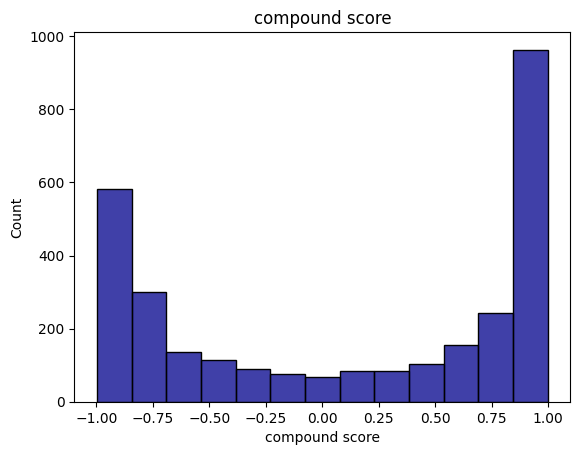

In [14]:
visual.histogram(sentiment_df, 'compound score')

The results suggest that the most common review sentiment is positive, followed by negative with the least reviews being neutral. This suggests that reviews tend to be strongly positive or negative compared to more neutral which makes sense as a customer is more inclined to make a review if their experience was positive or negative.

We can now look at grouping the reviews based on compound score into categories of sentiment, firstly the overall sentiment which is either 'Positive', 'Negative' or 'Neutral' then this can be broken down further into magnitude of sentiment, e.g. 'Very Negative', 'Slightly Positive', 'Positive', 'Neutral' etc. This sentiment type can be assigned to each review on the dataframe.

These compound score thresholds were:

- 'Positive' sentiment: compound score >= 0.05
- 'Neutral' sentiment: -0.05 < compound score < 0.05
- 'Negative' sentiment: compound score <= 0.05

*Based on VADER Sentiment analysis GitHub repository (https://github.com/cjhutto/vaderSentiment.git).*

In [15]:
analysis.determine_overall_sentiment(sentiment_df)
analysis.determine_specific_sentiment(sentiment_df)
sentiment_df

,reviews,negative score,neutral score,positive score,compound score,sentiment,specific sentiment
0,horrendous experience. high cost of seat res...,0.114,0.849,0.037,-0.9572,Negative,Very Negative
1,absolutely pathetic business class product. b...,0.067,0.805,0.129,0.9775,Positive,Very Positive
2,overall not bad. staff look tired and overwo...,0.047,0.841,0.113,0.9644,Positive,Very Positive
3,this was our first flight with british airway...,0.071,0.697,0.231,0.9690,Positive,Very Positive
4,i recently encountered a highly disappointing...,0.140,0.767,0.093,-0.8855,Negative,Very Negative
...,...,...,...,...,...,...,...
2995,travelled with my wife from barbados to london...,0.000,0.846,0.154,0.8955,Positive,Very Positive
2996,lgw-agp club europe. ground staff were very ch...,0.045,0.742,0.213,0.9529,Positive,Very Positive
2997,ba seem to be trying harder ground customer se...,0.039,0.739,0.222,0.9901,Positive,Very Positive
2998,madrid-london city return. excellent experienc...,0.055,0.648,0.297,0.9798,Positive,Very Positive


Now we can take a closer look at this data, to understand how the sentiments are distributed through the reviews.

c:\Users\joels\OneDrive\professional\british_airways_course\data_visualisation.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(specific_probabilities.index), x=list(specific_probabilities.values), palette=reversed(color_shades), ax=axes[1]) # Generating the bar plot.


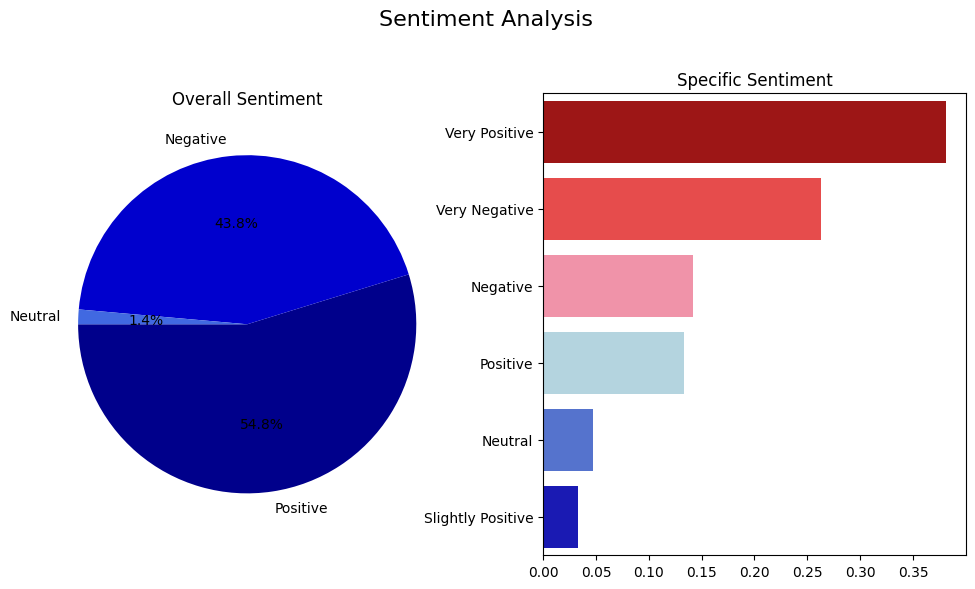

In [16]:
visual.sentiment_analysis(sentiment_df)

The pie chart in the visual above supports the compound score histogram in showing that positive reviews are most common (55 %) followed by negative (44 %) and neutral reviews are the least common (1 %). The bar plot shows that the most common types of reviews are strong sentiment reviews (positive followed by negative) then normal negative and positive reviews, then neutral and slightly positive or negative sentiment reviews occur the least.

## Conclusion

Overall the topic modelling and sentiment analysis indicates that customers are more inclined to write a review if they have strong sentiments about their experience and the key aspects of their experience that customers right about tend to be their in-flight experience, customer service and comfort among others. Most reviews are (strongly) positive however negative reviews are prevelant.

Further analysis could refine the topic modelling to reduce the number of topics and make them more streamlined and specific. Furthermore sentiment analysis could be segmented across topics to undertand customer sentiments on specific areas of their experience with British Airways. More machine learning algorithms could also be considered to identify trends in sentiment among topics.